In [1]:
from utils_project import *
sys.path.insert(0,  f'{user}/Dropbox/Projects/fmri_tools/GLMs/2nd_level')
from second_level import *
from searchlights import * 

Detected user: /Users/matty_gee
Base directory: /Volumes/synapse/projects/SocialSpace/Projects/SNT-fmri_place/Trajectory_analyses
Included n=50
Found 53 mask nifties


# Temporal and familiarity similarity can't explain the dimension effect
not sure if this i the best way to test this...

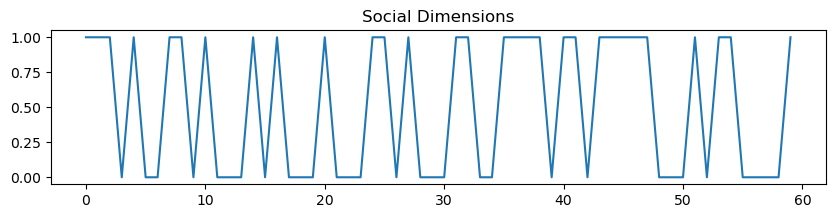

Levene test for equal variance: p=0.587
T-test for familiarity difference: t=-0.601, p=0.548
Levene test for equal variance: p=0.256
T-test for onset closeness: t=-0.458, left-tailed p=0.647


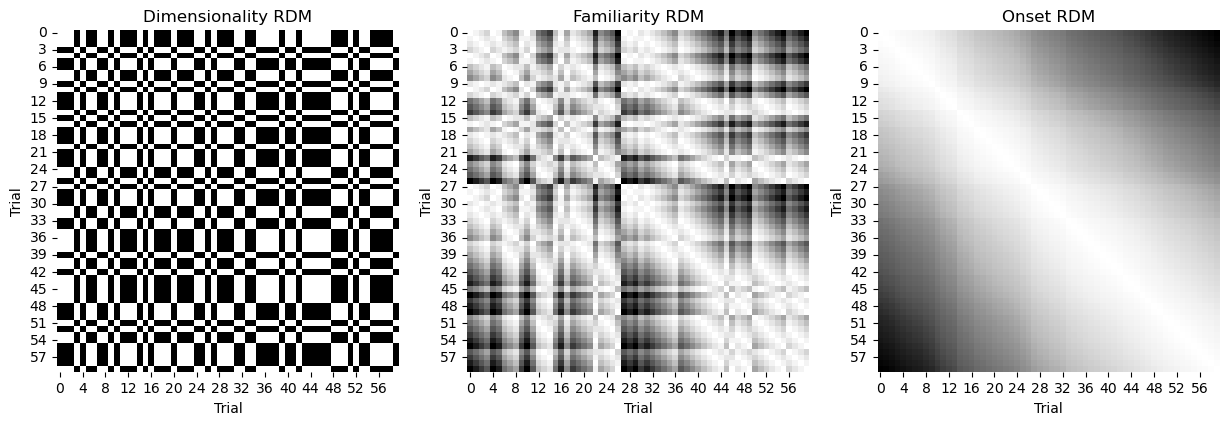

In [28]:
# plot the individual trials
affil = remove_neutrals((decision_trials['dimension'] == 'affil').values.astype(int))[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(affil)
ax.set_title('Social Dimensions')
plt.show()

dim_rdm = pairwise_distances(affil, metric='hamming')
dim_rdv = symm_mat_to_ut_vec(dim_rdm)

# compare dimensions on familiarity
familiarity      = remove_neutrals(decision_trials['char_decision_num'].values)
familiarity_rdm  = pairwise_distances(familiarity.reshape(-1, 1), metric='euclidean')
familiarity_rdv  = symm_mat_to_ut_vec(familiarity_rdm)
familiarity_same = familiarity_rdv[dim_rdv==1]
familiarity_diff = familiarity_rdv[dim_rdv==0]

p = scipy.stats.levene(familiarity_same, familiarity_diff)[1]
print(f'Levene test for equal variance: p={p:.3f}')
t, p = scipy.stats.ttest_ind(familiarity_same, familiarity_diff, equal_var=True)
print(f'T-test for familiarity difference: t={t:.3f}, p={p:.3f}')

# compare dimensions on onsets
onsets     = remove_neutrals(decision_trials['cogent_onset'].values)
onset_rdm  = pairwise_distances(onsets.reshape(-1, 1), metric='euclidean')
onset_rdv  = symm_mat_to_ut_vec(onset_rdm)
onset_same = onset_rdv[dim_rdv==1]
onset_diff = onset_rdv[dim_rdv==0]

p = scipy.stats.levene(onset_same, onset_diff)[1]
print(f'Levene test for equal variance: p={p:.3f}')
t, p = scipy.stats.ttest_ind(onset_same, onset_diff, equal_var=True) # even 1-sided isnt significant
print(f'T-test for onset closeness: t={t:.3f}, left-tailed p={p:.3f}')


#-------------
# plot heatmap
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ax = axs[0]
sns.heatmap(dim_rdm, cmap='Greys', square=True, ax=ax)
ax.set(title='Dimensionality RDM', xlabel='Trial', ylabel='Trial')
ax.collections[0].colorbar.remove()

ax = axs[1]
sns.heatmap(familiarity_rdm, cmap='Greys', square=True, ax=ax)
ax.set(title='Familiarity RDM', xlabel='Trial', ylabel='Trial')
ax.collections[0].colorbar.remove()

ax = axs[2]
sns.heatmap(onset_rdm, cmap='Greys', square=True, ax=ax)
ax.set(title='Onset RDM', xlabel='Trial', ylabel='Trial')
ax.collections[0].colorbar.remove()
plt.show()

# Plot

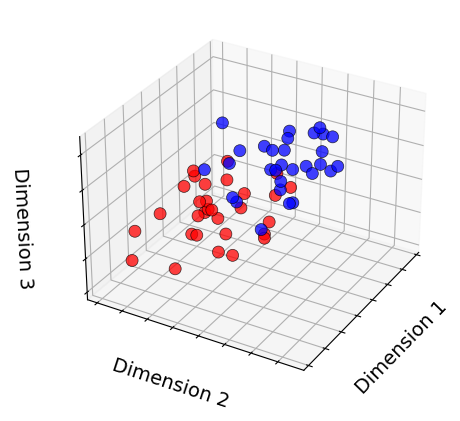

In [52]:
# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_points = 30

# # make points but mre spread out
# red_mean = [0.5, 0.5, 0.25] # mean
# red_cov  = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # covariance
# blue_mean = [1.25, 3, 5]  # mean
# blue_cov  = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]  # covariance
# red_cluster  = np.random.multivariate_normal(red_mean, red_cov, num_points)
# blue_cluster = np.random.multivariate_normal(blue_mean, blue_cov, num_points)

# Create the plot
fig = plt.figure(figsize=(5,5))
ax =  fig.add_subplot(111, projection='3d')
# change the angle
ax.view_init(30, 30)

# remove ticks and tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.grid(True, alpha=0.5)

# Plot the red and blue clusters
ax.scatter(red_cluster[:, 0], red_cluster[:, 1], red_cluster[:, 2], 
           c='r', alpha=0.75, s=75, edgecolor='k', linewidth=0.5)
ax.scatter(blue_cluster[:, 0], blue_cluster[:, 1], blue_cluster[:, 2], 
           c='b', alpha=0.75, s=75, edgecolor='k', linewidth=0.5)

# add labels to axes: "brain dimension 1"...
ax.set_xlabel('Dimension 1', fontsize=14)
ax.set_ylabel('Dimension 2', fontsize=14)
ax.set_zlabel('Dimension 3', fontsize=14)

save_figure(fig, f'{fig_dir}/dimensional_abstract')
plt.show()
